In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.models import Sequential 
from keras.layers import Input, Dense
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm

# **Carga de datos**

In [38]:
RC_circuit_db = pd.read_csv('db_completa_RC.csv')
RC_circuit_db.head()

,time,voltaje_ent,voltaje_cap_5,Resistencia real,Capacitancia Real
0,0,4.93,0.00,53300,100
1,200,4.93,0.00,53300,100
2,400,4.93,0.02,53300,100
3,600,4.93,0.24,53300,100
4,800,4.93,0.43,53300,100


In [39]:
RC_circuit_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               20000 non-null  int64  
 1   voltaje_ent        20000 non-null  float64
 2   voltaje_cap_5      20000 non-null  float64
 3   Resistencia real   20000 non-null  int64  
 4   Capacitancia Real  20000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 781.4 KB


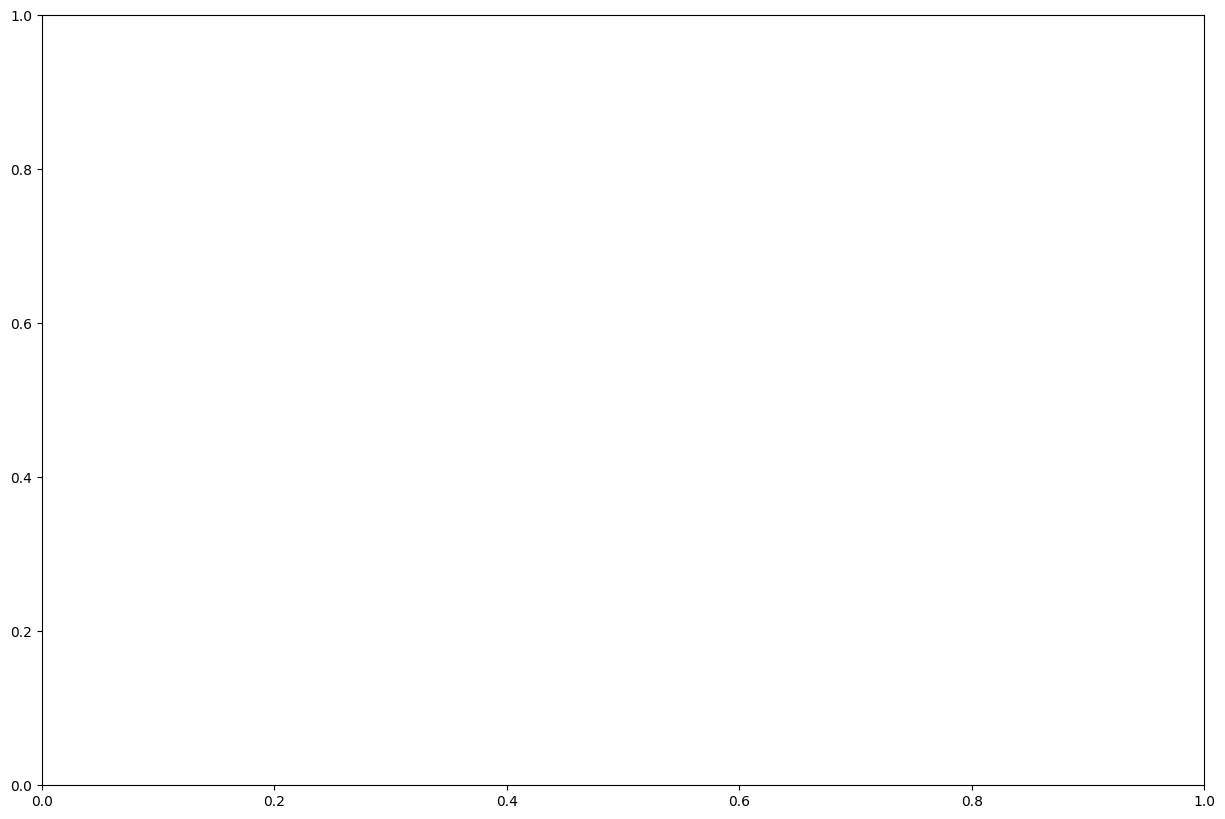

In [40]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.boxplot(data = RC_circuit_db.drop(['time', 'voltaje_ent', 'voltaje_cap_5', 'Resistencia real', 'Capacitancia Real'], axis = 1))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

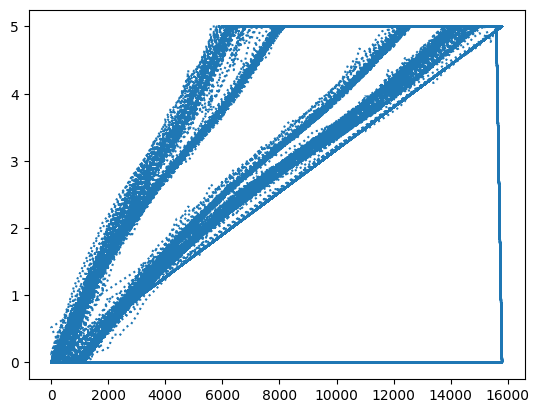

In [41]:
plt.figure()
plt.plot(RC_circuit_db['time'], RC_circuit_db['voltaje_cap_5'],':')
plt.show

In [42]:
# %%Creacion de los arreglos para el entrenamiento de la regresion lineal multiple
X = RC_circuit_db[['time', 'Capacitancia Real', 'Resistencia real', 'voltaje_ent']].values
y = RC_circuit_db['voltaje_cap_5'].values  

print(X.shape)
print(y.shape)

(20000, 4)
(20000,)


# **Creacion de modelo lineal**

In [43]:
X_train, X_test, y_train, y_test=  train_test_split(X, y, test_size=0.30, random_state = 2002)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 4)
(6000, 4)
(14000,)
(6000,)


In [44]:
#crear el modelo Lineal para la carga real del capacitor

model_linear = LinearRegression()

model_linear.fit(X_train, y_train)

LinearRegression()

In [45]:
pred_tr = model_linear.predict(X_train)

pred_te = model_linear.predict(X_test)

In [46]:
print('RMSE (train): ', np.sqrt(np.mean((y_train - pred_tr)**2)))
print('RMSE (test): ', np.sqrt(np.mean((y_test - pred_te)**2)))

RMSE (train):  0.7934921324005038
RMSE (test):  0.7949901713297189


## Evaluacion del modelo

In [47]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)

    print('explained_variance: ', round(ev,4))    
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('R²: ', round(r2,4))

In [48]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, pred_tr)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, pred_te)
print("")

#%% Results per output
mse_train = mean_squared_error(y_train, pred_tr)

r2_train = r2_score(y_train, pred_tr)

mse_test = mean_squared_error(y_test, pred_te)

r2_test = r2_score(y_test, pred_te)

col_names = ('MSE (train)', 'R2 (train)', 'MSE (test)', 'R2 (test)')

df = np.array([mse_train, r2_train, mse_test, r2_test])

print("")
print('---------- Evaluation per output ----------')
results = pd.DataFrame(data = df.reshape(1,-1), columns = col_names)
print(results)


---------- Evaluation on Training Data ----------
explained_variance:  0.7796
MAE:  0.5744
MSE:  0.6296
R²:  0.7796

---------- Evaluation on Test Data ----------
explained_variance:  0.7818
MAE:  0.5779
MSE:  0.632
R²:  0.7818


---------- Evaluation per output ----------
   MSE (train)  R2 (train)  MSE (test)  R2 (test)
0      0.62963    0.779637    0.632009   0.781785


## Coeficientes del modelo lineal

In [49]:
print('coeficientes del modelo lineal: ', model_linear.coef_)
print('intercepcion del modelo lineal: ', model_linear.intercept_)

coeficientes del modelo lineal:  [3.19684207e-04 1.42153364e-04 1.02506716e-06 1.39041269e-34]
intercepcion del modelo lineal:  0.4616013495809219


# **Evaluacion estadistica del modelo**

## Prueba pendiente-intercepto

### Graficamos el modelo obtenido

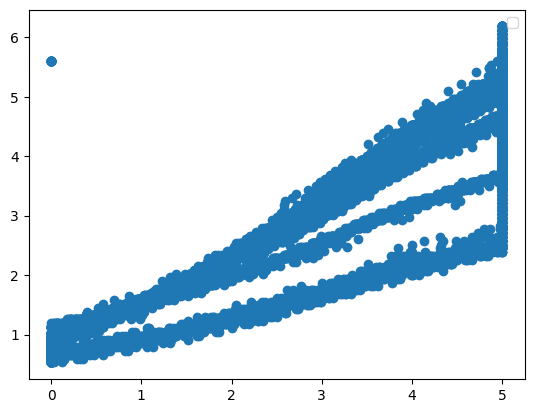

In [50]:
plt.figure()
plt.legend('Modelo Lineal')
plt.scatter(y_train, pred_tr)
plt.show()

### Obtenemos un resumen de nuestro modelo

In [51]:
y_train_ppi1 = sm.add_constant(y_train, prepend=True)
ppi1 = sm.OLS(pred_tr, y_train_ppi1)
ppi1 = ppi1.fit()
print(ppi1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 4.952e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:48:01   Log-Likelihood:                -14884.
No. Observations:               14000   AIC:                         2.977e+04
Df Residuals:                   13998   BIC:                         2.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7133      0.013     55.756      0.0

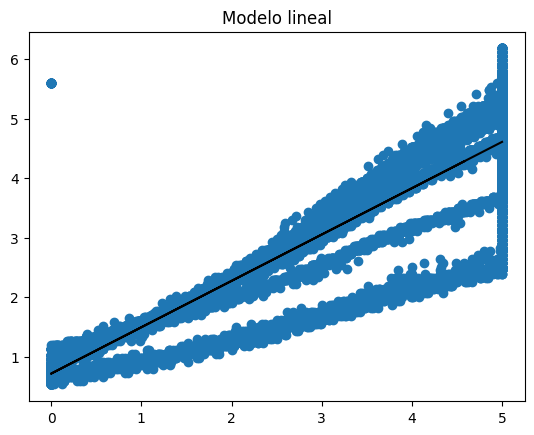

In [52]:
plt.figure()
plt.title('Modelo lineal')
plt.scatter(y_train, pred_tr)
plt.plot(y_train, ppi1.params[1]*y_train + ppi1.params[0], 'k')
plt.show()

# **Creacion de modelo polinomial**

In [53]:
#%% Para Regresion Polinomial

scaler = preprocessing.MinMaxScaler(feature_range = (0.1, 0.9))
X_pol= PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X_pol, y, test_size = 0.20)

In [54]:
#crear el modelo polinomial para la carga real del capacitor

model_pol = LinearRegression()

model_pol.fit(X_train_pol, y_train_pol)

LinearRegression()

In [55]:
pred_tr_pol = model_pol.predict(X_train_pol)
pred_te_pol = model_pol.predict(X_test_pol)

## Evaluacion del modelo polinomial

In [56]:
print('RMSE (train): ', np.sqrt(np.mean((y_train_pol - pred_tr_pol)**2)))
print('RMSE (test): ', np.sqrt(np.mean((y_test_pol - pred_te_pol)**2)))

RMSE (train):  0.40463010966899643
RMSE (test):  0.3784503716303101


In [57]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train_pol, pred_tr_pol)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test_pol, pred_te_pol)
print("")

#%% Results per output
mse_train = mean_squared_error(y_train_pol, pred_tr_pol)

r2_train = r2_score(y_train_pol, pred_tr_pol)

mse_test = mean_squared_error(y_test_pol, pred_te_pol)

r2_test = r2_score(y_test_pol, pred_te_pol)

col_names = ('MSE (train)', 'R2 (train)', 'MSE (test)', 'R2 (test)')

df = np.array([mse_train, r2_train, mse_test, r2_test])

print("")
print('---------- Evaluation per output ----------')
results = pd.DataFrame(data = df.reshape(1,-1), columns = col_names)
print(results)


---------- Evaluation on Training Data ----------
explained_variance:  0.9432
MAE:  0.2568
MSE:  0.1637
R²:  0.9432

---------- Evaluation on Test Data ----------
explained_variance:  0.9492
MAE:  0.2561
MSE:  0.1432
R²:  0.9492


---------- Evaluation per output ----------
   MSE (train)  R2 (train)  MSE (test)  R2 (test)
0     0.163726    0.943169    0.143225    0.94923


## Coeficientes del modelo polinomial

In [58]:
print('coeficientes del modelo polinomial: ', model_pol.coef_)
print('intercepcion modelo polinomial: ', model_pol.intercept_)

coeficientes del modelo polinomial:  [ 2.20193804e-11  2.78829225e-18 -3.88983451e-16  5.75015866e-18
 -6.93097085e-10  1.95134952e-08  7.14172352e-10  1.08555545e-10
 -7.43979192e-16  2.27762323e-15  2.17670251e-17 -1.16888513e-11
 -1.34149238e-15  5.43988521e-39 -2.58621590e-14 -2.64390971e-12
 -6.75313808e-15 -3.41696863e-09 -7.13649465e-11  3.06834429e-13
  9.62015316e-08 -1.56983143e-13  3.52086970e-09  5.35178838e-10
 -4.24842659e-11  1.84062684e-10 -3.66785964e-15 -5.12211275e-12
  1.12286077e-14  1.07309549e-16  3.76445628e-14 -5.76260367e-11
 -6.61355647e-15  1.83788481e-36]
intercepcion modelo polinomial:  -2.4383674598646627


# **Evaluacion estadistica del modelo**

## Prueba pendiente-intercepto

### Graficamos el modelo obtenido

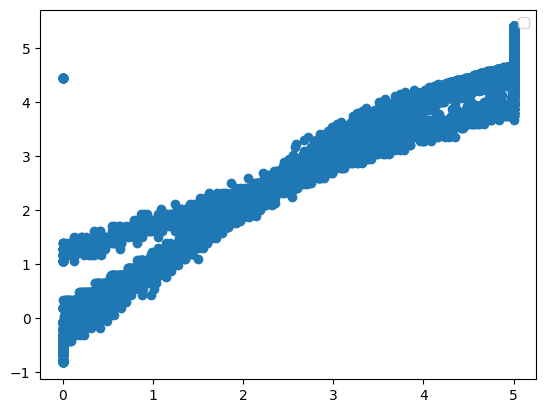

In [59]:
plt.figure()
plt.legend('Modelo Polinomial')
plt.scatter(y_train_pol, pred_tr_pol)
plt.show()

In [60]:
import statsmodels.api as sm

In [61]:
y_train_ppi_pol = sm.add_constant(y_train_pol, prepend = True)
ppi2 = sm.OLS(y_train_pol, y_train_ppi_pol)
ppi2 = ppi2.fit()
print(ppi2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.754e+32
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:48:07   Log-Likelihood:             4.9332e+05
No. Observations:               16000   AIC:                        -9.866e+05
Df Residuals:                   15998   BIC:                        -9.866e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.779e-15   1.68e-16    -46.429      0.0

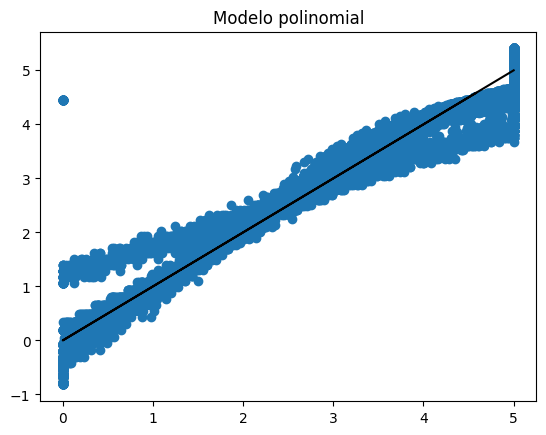

In [62]:
plt.figure()
plt.title('Modelo polinomial')
plt.scatter(y_train_pol, pred_tr_pol)
plt.plot(y_train, ppi2.params[1]*y_train + ppi2.params[0], 'k')
plt.show()


# **Creacion de ANN con Keras**

## Normalizacion de los datos

In [63]:
def normalize(x, xmin, xmax):
    return (xmax - xmin)*((x - np.min(x))/(np.max(x) - np.min(x))) + xmin


In [64]:
X_min = 0.1
X_max = 0.8

X = normalize(X, X_min, X_max)


## Segmentacion de la base de datos

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2002)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 4)
(6000, 4)
(14000,)
(6000,)


## Construccion de la ANN

In [31]:
n_neurons = 10
model = Sequential(name = "Model-with-Four-Inputs") # Model
model.add(Input(shape=(X.shape[1],), name = 'Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(n_neurons, activation='sigmoid', name = 'Hidden-Layer')) # Hidden Layer
model.add(Dense(1, activation = 'linear', name = 'Output-Layer')) # Output Layer}
model.summary()


2024-11-13 11:16:50.453775: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

## Compilacion del modelo

In [71]:
model.compile(optimizer = 'sgd', # default='rmsprop', an algorithm to be used in backpropagation
              loss = 'mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics = ['mean_squared_error','mean_absolute_error'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
            )

## Entrenamiento

In [ ]:
history = model.fit(X_train, # input data
                    y_train, # target data
                    #batch_size = 10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs = 500, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose = 1, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    #callbacks = [earlyStopping, mcp_save],
                    validation_data = (X_test, y_test))

In [68]:
'''
r2 = 0
goal = 0.95
n_neurons = 30
while r2 < goal:
    r2 = 0
    model = Sequential(name = "Model-with-Four-Inputs") # Model
    model.add(Input(shape=(X.shape[1],), name = 'Input-Layer')) # Input Layer - need to speicfy the shape of inputs
    model.add(Dense(n_neurons, activation='sigmoid', name = 'Hidden-Layer')) # Hidden Layer
    model.add(Dense(1, activation = 'linear', name = 'Output-Layer')) # Output Layer}
    model.summary()

    model.compile(optimizer = 'sgd', # default='rmsprop', an algorithm to be used in backpropagation
              loss = 'mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics = ['mean_squared_error','mean_absolute_error'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
            )
    
    history = model.fit(X_train, # input data
                    y_train, # target data
                    #batch_size = 10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs = 100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose = 0, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    #callbacks = [earlyStopping, mcp_save],
                    validation_data = (X_test, y_test))
    
    r2 = r2_score(y_train, model.predict(X_train))
    print(f"Neurons: {n_neurons}, R2: {r2}")
    n_neurons += 5
'''

Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
Neurons: 30, R2: 0.7756214088947626


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 35)             │           175 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
Neurons: 35, R2: 0.7799462067998985


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 40)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
Neurons: 40, R2: 0.7798253387187657


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 45)             │           225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
Neurons: 45, R2: 0.76970805987704


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
Neurons: 50, R2: 0.762392492752161


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 55)             │           275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
Neurons: 55, R2: 0.7794345065582755


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 60)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
Neurons: 60, R2: 0.7751716101662464


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 65)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
Neurons: 65, R2: 0.7785794193205945


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 70)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421 (1.64 KB)

 Trainable params: 421 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
Neurons: 70, R2: 0.7787029336937575


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 75)             │           375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
Neurons: 75, R2: 0.7739307201415588


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 80)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
Neurons: 80, R2: 0.6936696351055213


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 85)             │           425 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            86 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
Neurons: 85, R2: 0.7769467414873356


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 90)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
Neurons: 90, R2: 0.7754046205392625


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 95)             │           475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │            96 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571 (2.23 KB)

 Trainable params: 571 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
Neurons: 95, R2: 0.76083203415263


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601 (2.35 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Neurons: 100, R2: 0.7755773003825869


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 105)            │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           106 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 631 (2.46 KB)

 Trainable params: 631 (2.46 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
Neurons: 105, R2: 0.7287999943935018


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 110)            │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661 (2.58 KB)

 Trainable params: 661 (2.58 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
Neurons: 110, R2: 0.7630192930861562


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 115)            │           575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           116 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691 (2.70 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
Neurons: 115, R2: 0.7605922915463785


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 120)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
Neurons: 120, R2: 0.777113280019393


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 125)            │           625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
Neurons: 125, R2: 0.7774769993144988


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 130)            │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           131 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 781 (3.05 KB)

 Trainable params: 781 (3.05 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
Neurons: 130, R2: 0.7433988621209326


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 135)            │           675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811 (3.17 KB)

 Trainable params: 811 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
Neurons: 135, R2: 0.7633599326976178


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 140)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           141 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 841 (3.29 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
Neurons: 140, R2: 0.751206130630013


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 145)            │           725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           146 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 871 (3.40 KB)

 Trainable params: 871 (3.40 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
Neurons: 145, R2: 0.7531568142036281


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 150)            │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901 (3.52 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
Neurons: 150, R2: 0.7781011068277943


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 155)            │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 931 (3.64 KB)

 Trainable params: 931 (3.64 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
Neurons: 155, R2: 0.7722563176456259


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 160)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
Neurons: 160, R2: 0.7747825079046557


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 165)            │           825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           166 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991 (3.87 KB)

 Trainable params: 991 (3.87 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
Neurons: 165, R2: 0.7749028976409773


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 170)            │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           171 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,021 (3.99 KB)

 Trainable params: 1,021 (3.99 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
Neurons: 170, R2: 0.7287855539308581


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 175)            │           875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,051 (4.11 KB)

 Trainable params: 1,051 (4.11 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
Neurons: 175, R2: 0.7775070804156371


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 180)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           181 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081 (4.22 KB)

 Trainable params: 1,081 (4.22 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
Neurons: 180, R2: 0.6570459252633126


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 185)            │           925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           186 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,111 (4.34 KB)

 Trainable params: 1,111 (4.34 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Neurons: 185, R2: 0.7590378557073465


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 190)            │           950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           191 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
Neurons: 190, R2: 0.7759019966165498


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 195)            │           975 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171 (4.57 KB)

 Trainable params: 1,171 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
Neurons: 195, R2: 0.7671292477382213


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 200)            │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neurons: 200, R2: 0.7409697838325493


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 205)            │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           206 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
Neurons: 205, R2: 0.7294618549532765


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 210)            │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           211 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,261 (4.93 KB)

 Trainable params: 1,261 (4.93 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
Neurons: 210, R2: 0.6724112782896693


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 215)            │         1,075 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291 (5.04 KB)

 Trainable params: 1,291 (5.04 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
Neurons: 215, R2: 0.7640064827146862


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 220)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321 (5.16 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
Neurons: 220, R2: 0.7640257211230123


Model: "Model-with-Four-Inputs"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 225)            │         1,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │           226 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,351 (5.28 KB)

 Trainable params: 1,351 (5.28 KB)

 Non-trainable params: 0 (0.00 B)

KeyboardInterrupt: 

## Evaluacion del modelo 

In [67]:

pred_tr = model.predict(X_train)
pred_te = model.predict(X_test)

#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, pred_tr)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, pred_te)
print("")

#%% Results per output
mse_train = mean_squared_error(y_train, pred_tr)

r2_train = r2_score(y_train, pred_tr)

mse_test = mean_squared_error(y_test, pred_te)

r2_test = r2_score(y_test, pred_te)

col_names = ('MSE (train)', 'R2 (train)', 'MSE (test)', 'R2 (test)')

df = np.array([mse_train, r2_train, mse_test, r2_test])

print("")
print('---------- Evaluation per output ----------')
results = pd.DataFrame(data = df.reshape(1,-1), columns = col_names)
print(results)

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step

---------- Evaluation on Training Data ----------
explained_variance:  0.7961
MAE:  0.5562
MSE:  0.5837
R²:  0.7957

---------- Evaluation on Test Data ----------
explained_variance:  0.7985
MAE:  0.5577
MSE:  0.5842
R²:  0.7983


---------- Evaluation per output ----------
   MSE (train)  R2 (train)  MSE (test)  R2 (test)
0     0.583666    0.795723    0.584173   0.798302


In [76]:
y_train_ppi_ANN = sm.add_constant(y_train, prepend = True)
ppi2 = sm.OLS(y_train, y_train_ppi_ANN)
ppi2 = ppi2.fit()
print(ppi2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.250e+32
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:06:53   Log-Likelihood:             4.2741e+05
No. Observations:               14000   AIC:                        -8.548e+05
Df Residuals:                   13998   BIC:                        -8.548e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.865e-15   2.43e-16     32.308      0.0

In [77]:
ppi2.params

array([7.86523624e-15, 1.00000000e+00])

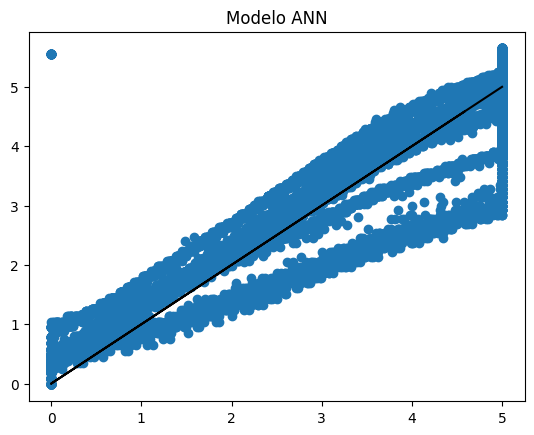

In [78]:
plt.figure()
plt.title('Modelo ANN')
plt.scatter(y_train, pred_tr)
plt.plot(y_train, ppi2.params[1]*y_train + ppi2.params[0], 'k')
plt.show()


# **ANN ELM**

In [79]:
class ANN():
    def __init__(self, X, Y, n_neuronas):
        self.x = X
        n_entradas = X.shape[1]
        self.IW = np.random.uniform(size = [n_entradas, n_neuronas])
        self.b = np.random.uniform(size = [n_neuronas])
        self.y = Y

    # Funciones de activacion\n",
    def logsig(self, n):
        return (1/(1 + np.exp(-n)))

    def tansig(self, n):
        return (2/(1 + np.exp(-2*n))) - 1

    def relu(self, n):
        return np.maximum(n, 0, n)

    def train(self):
        self.LW = np.dot(np.linalg.pinv(self.logsig(self.x.dot(self.IW) + self.b)), self.y)

    def predict(self, Xdata):
        self.x = Xdata
        return np.dot(self.logsig(self.x.dot(self.IW) + self.b), self.LW)

In [80]:
# X [k_muestras x n_variables_entrada]
# y [k_muestras]
    
r2 = 0
goal = 0.98
n_neuronas = 1
    
while r2 < goal:
    model = ANN(X_train, y_train, n_neuronas)
    model.train()
    y_train_pred = model.predict(X_train)
    
    r2 = r2_score(y_train, y_train_pred)
    
    n_neuronas += 1
    
print("Best model with %d neurons" % (n_neuronas))

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

regression_results(y_train, y_train_pred)
regression_results(y_test, y_test_pred)

#print(\RMSE (train):\, np.sqrt(np.mean( (y_train-y_train_pred)**2) ))
#print(\RMSE (test):\, np.sqrt(np.mean( (y_test-y_test_pred)**2) ))
regression_results(y_test, y_test_pred)

Best model with 29 neurons
explained_variance:  0.9806
MAE:  0.1121
MSE:  0.0553
R²:  0.9806
explained_variance:  0.9808
MAE:  0.1105
MSE:  0.0556
R²:  0.9808
explained_variance:  0.9808
MAE:  0.1105
MSE:  0.0556
R²:  0.9808
